# Identification

Student names and matriculation numbers

Mariana Carvalho - a22001926
Gonçalo Matias - a22008333

We declare that the code and analyses contained in this notebook were produced by ourselves and therefore were not copied from elsewhere.

---
# Notes
---
When a code cell has the text `Your code here`, feel free to split it into more cells (code and/or markdown), if it is more convenient for you.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import cov
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

In [65]:
covid_df = pd.read_csv('covid-data.csv')

In [66]:
covid_df.rename(columns={"female_smokers_prc.1": "male_smokers_prc"}, inplace=True)

---
# Análise bivariada de dados
---

**TO-DO A9**

In [67]:
# Your code here
uniaoE_df = covid_df.loc[(covid_df['location'] == 'Austria') | (covid_df['location'] == 'Belgium') | 
                         (covid_df['location'] == 'Bulgaria') | (covid_df['location'] == 'Belgium') | 
                         (covid_df['location'] == 'Bulgaria') | (covid_df['location'] == 'Croatia') | 
                         (covid_df['location'] == 'Cyprus') | (covid_df['location'] == 'Czechia') | 
                         (covid_df['location'] == 'Denmark') | (covid_df['location'] == 'Estonia') | 
                         (covid_df['location'] == 'Finland') | (covid_df['location'] == 'France') | 
                         (covid_df['location'] == 'Germany') | (covid_df['location'] == 'Greece') | 
                         (covid_df['location'] == 'Hungary') | (covid_df['location'] == 'Ireland') | 
                         (covid_df['location'] == 'Italy') | (covid_df['location'] == 'Latvia') | 
                         (covid_df['location'] == 'Lithuania') | (covid_df['location'] == 'Luxembourg') | 
                         (covid_df['location'] == 'Malta') | (covid_df['location'] == 'Netherlands') | 
                         (covid_df['location'] == 'Poland') | (covid_df['location'] == 'Portugal') | 
                         (covid_df['location'] == 'Romania') | (covid_df['location'] == 'Slovakia') | 
                         (covid_df['location'] == 'Slovenia') | (covid_df['location'] == 'Netherlands') | 
                         (covid_df['location'] == 'Spain') | (covid_df['location'] == 'Sweden')]

In [16]:
uniaoENa_df = uniaoE_df.dropna(subset=['new_deaths'])
uniaoENa_df

,Unnamed: 0,continent,location,date,new_cases,new_deaths,reproduction_rate,icu_patients,hosp_patients,weekly_icu_admissions,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty_prc,cardiovasc_death_per_hundred_thousand,diabetes_pop_rate_aged_20_to_79,female_smokers_prc,male_smokers_prc,hospital_beds_per_thousand,life_expectancy
12413,12413,Europe,Austria,2020-03-14,97.0,1.0,2.88,NaN,NaN,NaN,...,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,7.37,81.54
12414,12414,Europe,Austria,2020-03-15,182.0,0.0,2.86,NaN,NaN,NaN,...,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,7.37,81.54
12415,12415,Europe,Austria,2020-03-16,210.0,1.0,2.80,NaN,NaN,NaN,...,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,7.37,81.54
12416,12416,Europe,Austria,2020-03-17,198.0,1.0,2.71,NaN,NaN,NaN,...,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,7.37,81.54
12417,12417,Europe,Austria,2020-03-18,226.0,2.0,2.62,NaN,NaN,NaN,...,19.202,13.748,45436.686,0.7,145.183,6.35,28.4,30.9,7.37,81.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190775,190775,Europe,Sweden,2022-09-25,0.0,0.0,1.39,NaN,NaN,NaN,...,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,2.22,82.80
190776,190776,Europe,Sweden,2022-09-26,0.0,0.0,1.39,NaN,NaN,NaN,...,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,2.22,82.80
190777,190777,Europe,Sweden,2022-09-27,0.0,0.0,1.39,NaN,NaN,NaN,...,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,2.22,82.80
190778,190778,Europe,Sweden,2022-09-28,0.0,0.0,1.39,NaN,NaN,NaN,...,19.985,13.433,46949.283,0.5,133.982,4.79,18.8,18.9,2.22,82.80


In [53]:
uniaoENa_df['new_deaths_ht'] = 100000 *  uniaoENa_df.loc[uniaoENa_df['new_deaths']] /  uniaoENa_df.loc[uniaoENa_df['population']]

KeyError: "None of [Float64Index([ 1.0,  0.0,  1.0,  1.0,  2.0,  2.0,  5.0,  3.0,  5.0,  6.0,\n              ...\n               0.0,  0.0, 78.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 47.0],\n             dtype='float64', length=25036)] are in the [index]"

<AxesSubplot:xlabel='male_smokers_prc', ylabel='new_deaths'>

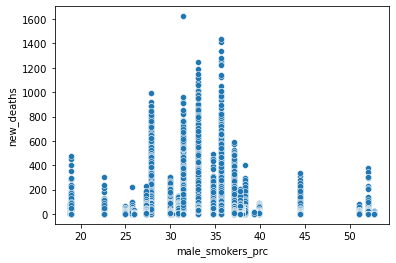

In [55]:
sns.scatterplot(data=uniaoENa_df, x = 'male_smokers_prc', y='new_deaths')

In [52]:
x = uniaoENa_df['male_smokers_prc']
y = uniaoENa_df['new_deaths']
corr, p = pearsonr(x,y)
print('correlação:', corr)
print('p-value:', p)

correlação: -0.01670181768415692
p-value: 0.008223760067062618


Your answer here

    Sim, existe pois quanto maior a percentagem de homens fumadores, maior o número de mortes.
    A monotonicidade significa que a relação entre as variáveis é crescente ou decrescente (ou seja, quando uma variável aumenta, a outra também aumenta ou diminui). A linearidade significa que a relação entre as variáveis é linear (ou seja, que pode ser representada por uma reta).
    Tendo em conta que as variáveis não cumprem os critérios de monotocidade e linearidade não é adequado calcular a correlação para medir a associação entre elas. 

---
# Componente estatística
---

**TO-DO E1**

In [38]:
# Your code here

def slice_df(df, country, var, date_i, date_f):
    df = uniaoENa_df.loc[uniaoENa_df['location'] == country]
    df_time = (uniaoENa_df['date'] >= date_i) & (uniaoENa_df['date'] <= date_f)
    df2 =  df.loc[df_time]
    myvar = pd.DataFrame(df2[var])
    print("Total de mortes:")
    print(df2[var].sum())
    return myvar
   

**TO-DO E2**

In [19]:
df = uniaoENa_df.loc[covid_df['location'] == 'Portugal']
df

,Unnamed: 0,continent,location,date,new_cases,new_deaths,reproduction_rate,icu_patients,hosp_patients,weekly_icu_admissions,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty_prc,cardiovasc_death_per_hundred_thousand,diabetes_pop_rate_aged_20_to_79,female_smokers_prc,male_smokers_prc,hospital_beds_per_thousand,life_expectancy
159917,159917,Europe,Portugal,2020-03-17,117.0,1.0,2.97,17.0,206.0,NaN,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
159918,159918,Europe,Portugal,2020-03-18,0.0,1.0,2.93,20.0,89.0,NaN,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
159919,159919,Europe,Portugal,2020-03-19,337.0,1.0,2.94,20.0,89.0,NaN,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
159920,159920,Europe,Portugal,2020-03-20,235.0,3.0,2.84,26.0,126.0,NaN,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
159921,159921,Europe,Portugal,2020-03-21,260.0,6.0,2.74,35.0,156.0,NaN,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160840,160840,Europe,Portugal,2022-09-26,4805.0,17.0,0.96,NaN,NaN,NaN,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
160841,160841,Europe,Portugal,2022-09-27,805.0,4.0,0.94,NaN,NaN,NaN,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
160842,160842,Europe,Portugal,2022-09-28,3277.0,5.0,0.94,NaN,NaN,NaN,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05
160843,160843,Europe,Portugal,2022-09-29,5693.0,7.0,NaN,NaN,NaN,NaN,...,21.502,14.924,27936.896,0.5,127.842,9.85,16.3,30.0,3.39,82.05


In [39]:
# Your code here
s1 = slice_df(uniaoENa_df, 'Portugal', 'new_deaths', '2020-03-01', '2020-03-31')
s1

Total de mortes:
160.0


,new_deaths
159917,1.0
159918,1.0
159919,1.0
159920,3.0
159921,6.0
159922,2.0
159923,9.0
159924,10.0
159925,10.0
159926,17.0


<AxesSubplot:xlabel='new_deaths', ylabel='Count'>

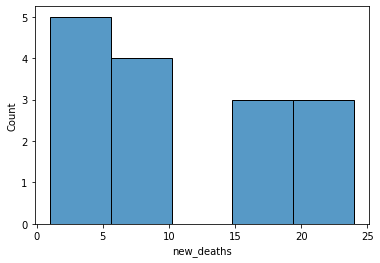

In [40]:
df_time = (uniaoENa_df['date'] >= '2020-03-01') & (uniaoENa_df['date'] <= '2020-03-31')
df2 =  df.loc[df_time]
sns.histplot(data = df2['new_deaths'])

In [57]:
s2 = slice_df(uniaoENa_df, 'Portugal', 'new_deaths', '2020-04-01', '2020-04-30')
s2

Total de mortes:
829.0


,new_deaths
159932,27.0
159933,22.0
159934,37.0
159935,20.0
159936,29.0
159937,16.0
159938,34.0
159939,35.0
159940,29.0
159941,26.0


<AxesSubplot:xlabel='new_deaths', ylabel='Count'>

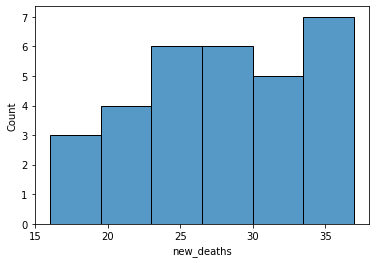

In [42]:
df_time = (uniaoENa_df['date'] >= '2020-04-01') & (uniaoENa_df['date'] <= '2020-05-01')
df2 =  df.loc[df_time]
sns.histplot(data = df2['new_deaths'])

In [58]:
# Execute o teste t-Student
t, p = ttest_ind(s1, s2)

# Interprete os resultados
if p < 0.05:
    print('As tendências centrais são diferentes (valor-p =', p, ')')
else:
    print('As tendências centrais são iguais (valor-p =', p, ')')

As tendências centrais são diferentes (valor-p = [5.51265779e-05] )


In [64]:
print("Médias:")
print(s1.mean())
print(s2.mean())
print("")
print("Medianas:")
print(s1.median())
print(s2.median())

Médias:
new_deaths    291.862069
dtype: float64
new_deaths    27.633333
dtype: float64

Medianas:
new_deaths    94.0
dtype: float64
new_deaths    27.5
dtype: float64


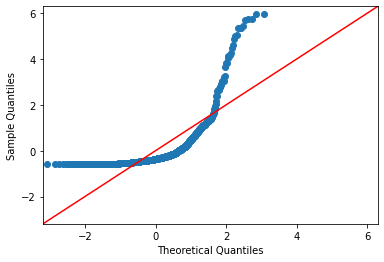

In [45]:
sm.qqplot(df['new_deaths'], fit=True, line='45');

Your answer here

    Tendo em conta as médias calculadas, podemos concluir que no primeiro mês se observou um número maior de mortes no país em relação ao segundo mês. 
    Tendo em conta as medianas, iremos obter o mesmo resultado, ou seja, a mediana do primeiro mês também será maior do que a mediana no segundo mês, sendo que houve mais mortes no primeiro mês do que no segundo. 
    No entanto, observando o gráfico a cima, podemos ver que, ao longo do tempo, o número de mortes no país aumenta.
    Assumindo que:
      H0: a tendência central dos primeiros 30 dias é igual à tendência central dos seguintes 30 dias
      H1: a tendência central dos primeiros 30 dias é diferente da tendência central dos seguintes 30 dias
    E sendo que as tendências centrais são diferentes, rejeitamos a hipotese nula com um valor-p de [5.51265779e-05].

**TO-DO E3**

In [51]:
# Your code here

print("Pais A:")
s1 = slice_df(uniaoENa_df, 'Spain', 'new_deaths', '2020-03-01', '2020-03-31')
print("Pais B:")
s2 = slice_df(uniaoENa_df, 'Portugal', 'new_deaths', '2020-03-01', '2020-03-31')

# Execute o teste t-Student
t, p = ttest_ind(s1, s2)


# Interprete os resultados
if p < 0.05:
    print('As tendências centrais são diferentes (valor-p =', p, ')')
else:
    print('As tendências centrais são iguais (valor-p =', p, ')')

Pais A:
Total de mortes:
8464.0
Pais B:
Total de mortes:
160.0
As tendências centrais são diferentes (valor-p = [0.00220651] )


    Não podemos assumir que estão em situções identicas, tendo em conta o numero de população de cada país. Sendo que neste caso Espanha tem um número maior de população do que Portugal. 
      H0: "a tendência central de Espanha é igual à tendência central de Portugal".
      H1: "a tendência central de Espanha é diferente da tendência central de Portugal".
    Sendo que valor-p é menos do que 0.05, rejeitamos H0.
    conclusão: 
    As tendências centrais são diferentes e, portanto, que a situação de Espanha e Portugal nos primeiros 30 dias da pandemia é diferente.
    

**TO-DO E4**

In [48]:
# Your code here

print("Pais A:")
s1 = slice_df(uniaoENa_df, 'Spain', 'new_deaths', '2020-03-01', '2020-03-31')
print("Pais B:")
s2 = slice_df(uniaoENa_df, 'Italy', 'new_deaths', '2020-03-01', '2020-03-31')

# Execute o teste t-Student
t, p = ttest_ind(s1, s2)


# Interprete os resultados
if p < 0.05:
    print('As tendências centrais são diferentes (valor-p =', p, ')')
else:
    print('As tendências centrais são iguais (valor-p =', p, ')')

Pais A:
Total de mortes:
8464.0
Pais B:
Total de mortes:
12399.0
As tendências centrais são iguais (valor-p = [0.19986341] )


      H0: "a tendência central de Espanha nos primeiros 30 dias da pandemia é igual à tendência central de Itália nos primeiros 30 dias da pandemia"
      H1: "a tendência central de Espanha nos primeiros 30 dias da pandemia é diferente da tendência central de Itália nos primeiros 30 dias da pandemia"
    Tendo em conta que o valor-p é maior do que 0.05, podemos conluir que as tendências centrais são iguais e, portanto, que a situação de Espanha e do país selecionado nos primeiros 30 dias da pandemia é a mesma.

### Bom trabalho!